In [126]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

#import math # 対数ガンマ関数:lgamma()
from scipy.stats import beta # ベータ分布


## ベルヌーイ分布の学習と予測
教科書3.2.1節を再現します。

[0.75 0.25]


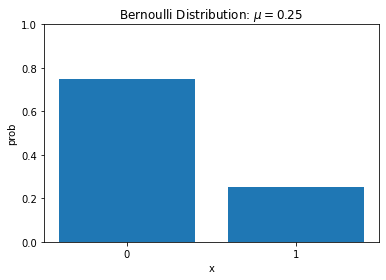

In [127]:
## 真のモデルの設定

# 真のパラメータを指定
mu_truth = 0.25

# x軸の値を設定
x_point = np.array([0, 1])

# 尤度(ベルヌーイ分布)を計算
true_model = np.array([1 - mu_truth, mu_truth]) # 確率
print(true_model)

# 尤度を作図
plt.bar(x=x_point, height=true_model) # 尤度
plt.xlabel('x')
plt.ylabel('prob')
plt.xticks(ticks=x_point, labels=x_point) # x軸目盛
plt.title('Bernoulli Distribution: $\mu=' + str(mu_truth) + '$')
plt.ylim(0.0, 1.0)
plt.show()


0.22


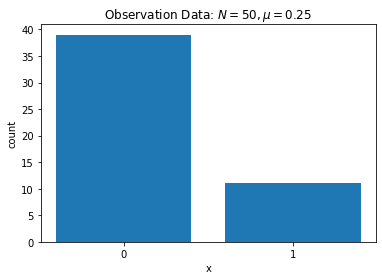

In [117]:
## 観測データの生成

# データ数を指定
N = 50

# (観測)データを生成
x_n = np.random.binomial(n=1, p=mu_truth, size=N)
print(np.sum(x_n) / N)

# 観測データのヒストグラムを作図
plt.bar(x=x_point, height=[N - np.sum(x_n), np.sum(x_n)]) # 観測データ
plt.xlabel('x')
plt.ylabel('count')
plt.xticks(ticks=x_point, labels=x_point) # x軸目盛
plt.title('Observation Data: $N=' + str(N) + ', \mu=' + str(mu_truth) + '$')
plt.show()


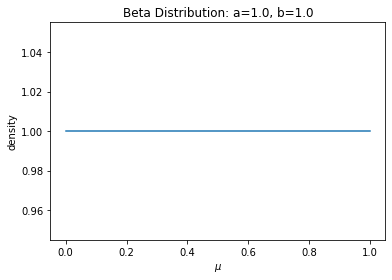

In [118]:
## 事前分布の設定

# 事前分布のパラメータを指定
a = 1.0
b = 1.0

# x軸の値を設定
mu_line = np.arange(0.0, 1.001, 0.001)

# 事前分布(ベータ分布)を計算
prior = beta.pdf(x=mu_line, a=a, b=b) 

# 事前分布を作図
plt.plot(mu_line, prior)
plt.xlabel('$\mu$')
plt.ylabel('density')
plt.title('Beta Distribution: a=' + str(a) + ', b=' + str(b))
plt.show()


a_hat = 12.0
b_hat = 40.0


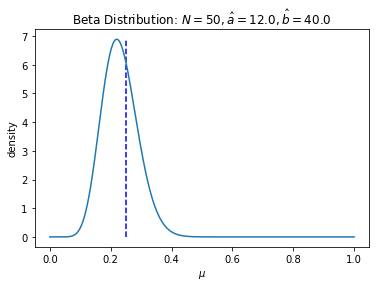

In [119]:
# 事後分布のパラメータを計算
a_hat = np.sum(x_n) + a # 式(3.15)より
b_hat = x_n.shape[0] - np.sum(x_n) + b # 式(3.15)より
print("a_hat =", a_hat)
print("b_hat =", b_hat)

# 事後分布(ベータ分布)の確率密度を計算
posterior = beta.pdf(x=mu_line, a=a_hat, b=b_hat)

# 事後分布（真のパラメタと予測で得た事後分布を可視化）
plt.plot(mu_line, posterior) # 事後分布
plt.vlines(x=mu_truth, ymin=0, ymax=max(posterior), linestyles='--',  color='blue') # 真のパラメータ
plt.xlabel('$\mu$')
plt.ylabel('density')
plt.title('Beta Distribution: $N=' + str(N) + ', \hat{a}=' + str(a_hat) + ', \hat{b}=' + str(b_hat) + '$')
plt.show()

In [120]:
## 図3.3 を再現するベイズ推論

# 真のパラメータを指定
mu_truth = 0.25

# 事前分布のパラメータに初期値を設定
a = 1.0
b = 1.0

# 初期値による予測分布のパラメータを式(3.22)より計算
mu_star = a / (a + b)

# 事前分布のx軸の値を作成
mu_line = np.arange(0.0, 1.001, 0.001)

# データ数(試行回数)を指定
N = 50

# logを取るための初期値を保存
x_n = np.empty(N)
log_a = [a]
log_b = [b]
log_mu = [mu_star]
log_posterior = [beta.pdf(x=mu_line, a=a, b=b)]
log_predict = [[1 - mu_star, mu_star]]

# 推論処理
for n in range(N):
    # (観測)データをランダムサンプリングで生成しデータを追加
    x_n[n] = np.random.binomial(n=1, p=mu_truth, size=1)
    
    # 事後分布のパラメータ式(3.22)より計算
    a += x_n[n]
    b += 1 - x_n[n]
    # 事後分布を計算
    log_posterior.append(beta.pdf(x=mu_line, a=a, b=b))
    
    # 予測分布のパラメータを計算
    mu_star = a / (a + b)
    # 予測分布を計算. append で後ろに追加
    log_predict.append([1 - mu_star, mu_star])
    
    # 値を記録
    log_a.append(a)
    log_b.append(b)
    log_mu.append(mu_star)

16.0 36.0


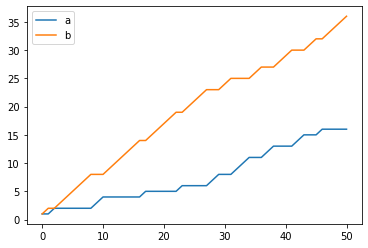

In [121]:
plt.plot(log_a, label="a")
plt.plot(log_b, label="b")
plt.legend()
print (log_a[-1], log_b[-1]) # マイナスでリストの後ろから値を取れる



In [122]:
# 作図処理を関数として定義(1)
def plot_posterior_distribution(n, log_posterior, log_a, log_b):
    plt.figure()    
    # nフレーム目の事後分布を作図
    plt.plot(mu_line, log_posterior[n]) # 事後分布
    plt.vlines(x=mu_truth, ymin=0, ymax=np.nanmax(log_posterior), linestyles='--', color='blue') # 真のパラメータ
    plt.xlabel('$\mu$')
    plt.ylabel('density')
    plt.title('$N=' + str(n) + ', \hat{a}=' + str(log_a[n]) + ', \hat{b}=' + str(log_b[n]) + '$', loc='left')

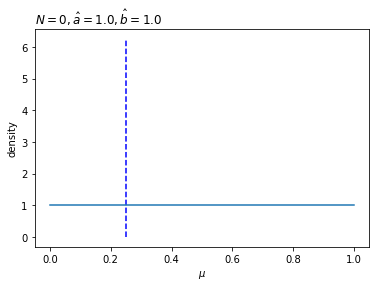

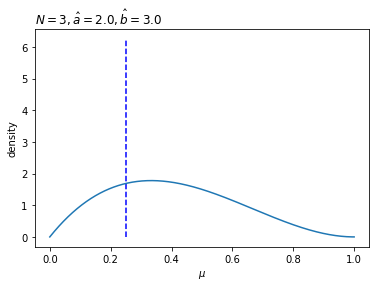

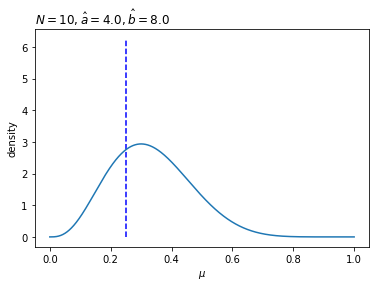

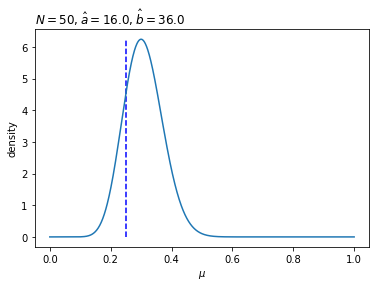

In [123]:
for i in [0, 3, 10, 50]:
  plot_posterior_distribution(i, log_posterior, log_a, log_b)

In [124]:
# 作図処理を関数として定義(2)
def plot_bernoulli_distribution(n, log_predict, log_mu, mu_truth):
  true_model = np.array([1 - mu_truth, mu_truth]) # 確率

  plt.figure()
  plt.bar(x=x_point, height=true_model, label='true', alpha=0.5, color='white', edgecolor='blue', linestyle='dashed') # 真のモデル
  plt.bar(x=x_point, height=log_predict[n], label='predict', alpha=0.5) # 予測分布
  plt.xlabel('x')
  plt.ylabel('prob')
  plt.xticks(ticks=x_point, labels=x_point) # x軸目盛
  plt.title('Bernoulli Distribution: $N=' + str(n) + ', \hat{\mu}_{*}=' + str(np.round(log_mu[n], 2)) + '$')
  plt.ylim(0.0, 1.0)
  plt.legend()
  plt.show()

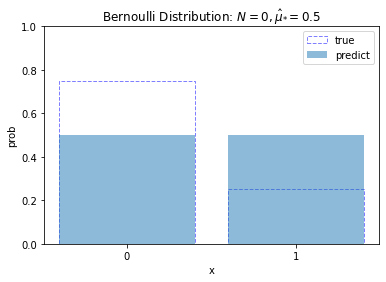

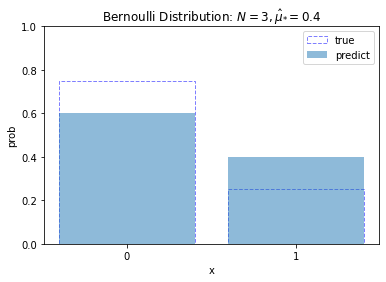

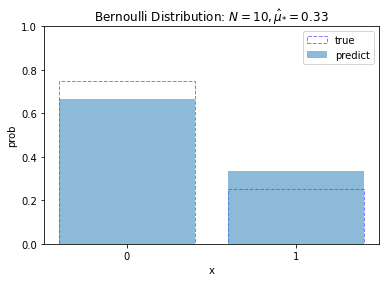

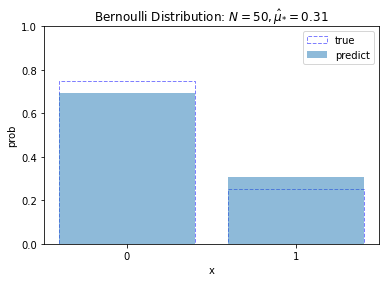

In [125]:
for i in [0, 3, 10, 50]:
  plot_bernoulli_distribution(i, log_predict, log_mu, mu_truth)